**Netflix Movies & TV Shows Analysis**

*Life Cycle Of Analysis Project* 

**1. problem statement**

**2) Data Collection**

•   Dataset Source - https://www.kaggle.com/datasets/shivamb/netflix-shows

•	The data consists of 12 columns and 8813 rows.

2.1 Import Data and Required Packages

In [4]:
!pip install numpy

In [5]:
!pip install pandas

In [6]:
!pip install matplotlib

In [7]:
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("netflix.csv")
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8808,s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States","June 22, 2017",2017,R,81 min,Horror Movies,This four-part anthology of short horror films...
8809,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8810,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."
8811,s8769,Movie,Y Tu Mamá También,Alfonso Cuarón,"Maribel Verdú, Gael García Bernal, Diego Luna,...",Mexico,"June 1, 2017",2001,R,106 min,"Dramas, Independent Movies, International Movies",When rich teens Tenoch and Julio meet the allu...
8812,s8770,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,"March 1, 2018",2008,TV-MA,137 min,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, ..."


In [6]:
df.shape

(8813, 12)

**Dataset Information**
- show_id:Unique ID for each show  
- type:Movie or TV Show  
- title:Title of the content  
- director:Director name  
- cast:Cast details  
- country:Country of production  
- date_added:Date added to Netflix  
- release_year:Release year  
- rating:Content rating  
- duration:Movie minutes / TV seasons  
- listed_in:Genre  
- description:Summary  

**3. Data Checks to perform**

**3.1 check missing values**

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**3.2 Check Duplicates**

In [8]:
df.duplicated().sum()

np.int64(6)

**3.3 Check data types**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8813 entries, 0 to 8812
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8813 non-null   object
 1   type          8813 non-null   object
 2   title         8813 non-null   object
 3   director      6179 non-null   object
 4   cast          7988 non-null   object
 5   country       7982 non-null   object
 6   date_added    8803 non-null   object
 7   release_year  8813 non-null   int64 
 8   rating        8809 non-null   object
 9   duration      8810 non-null   object
 10  listed_in     8813 non-null   object
 11  description   8813 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.3+ KB


**3.4 Checking the number of unique values of each column**

In [10]:
df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**3.5 Check statistics of data set**

In [11]:
df.describe()

,release_year
count,8813.000000
mean,2014.173607
std,8.821838
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**3.6 Checking various categories in categorical columns**

In [12]:
for col in df.select_dtypes(include="object").columns:
    print(f"(col) : {df[col].unique()}")

(col) : ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
(col) : ['Movie' 'TV Show']
(col) : ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
(col) : ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
(col) : [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sar

**4.Data pre-Processing**

**4.1 Handling Missing Values**

In [13]:
df["director"].fillna("Not Available", inplace=True)
df["cast"].fillna("Not Available", inplace=True)
df["country"].fillna("Not Available", inplace=True)
df["date_added"].fillna(df["date_added"].mode()[0], inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)
df["duration"].fillna(df["duration"].mode()[0], inplace=True)

**4.2 Handling Duplicate Records**

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

**5. Exploratory Data Analysis (EDA)**

**5.1 univariate**


Content Type Distribution

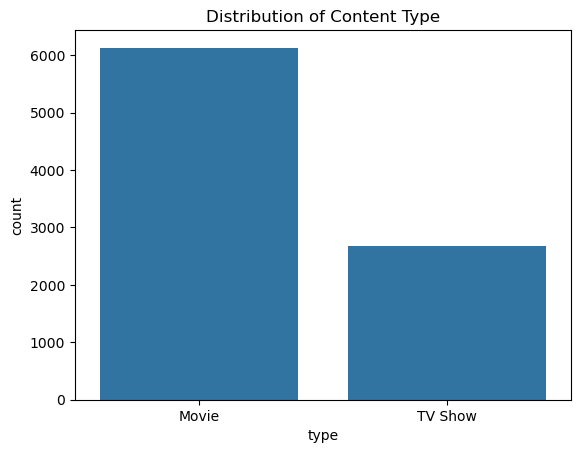

In [17]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Type')
plt.show()

Rating Distribution

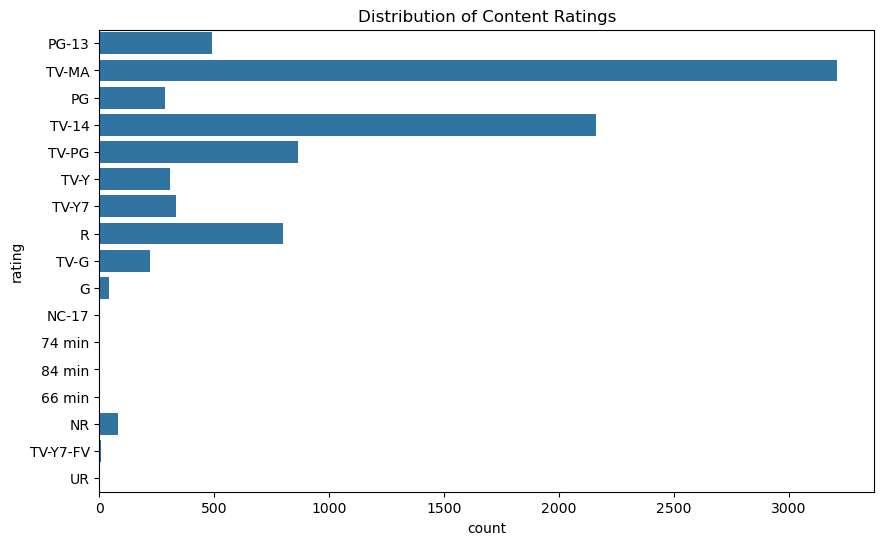

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y='rating', data=df)
plt.title('Distribution of Content Ratings')
plt.show()

**5.2 bivariate**


Content Type vs Rating

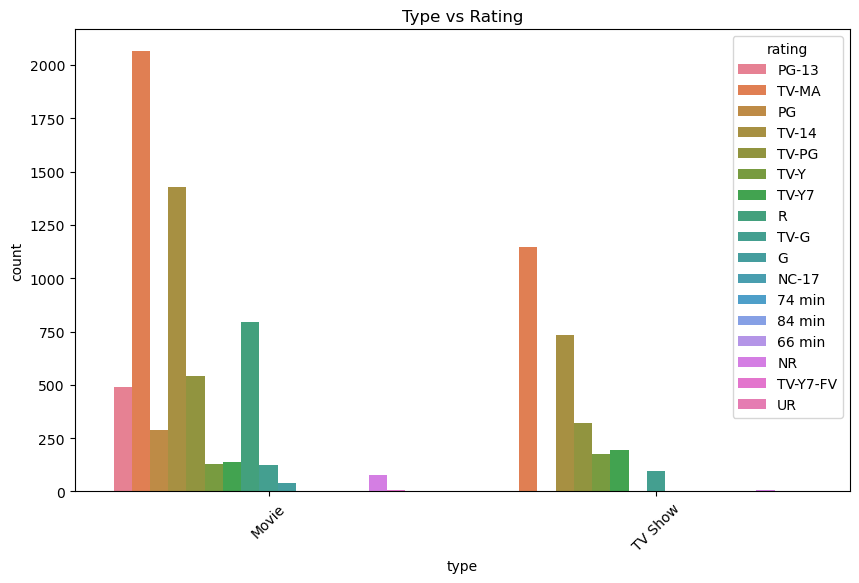

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', hue='rating', data=df)
plt.title('Type vs Rating')
plt.xticks(rotation=45)
plt.show()

Content Type vs Release Year

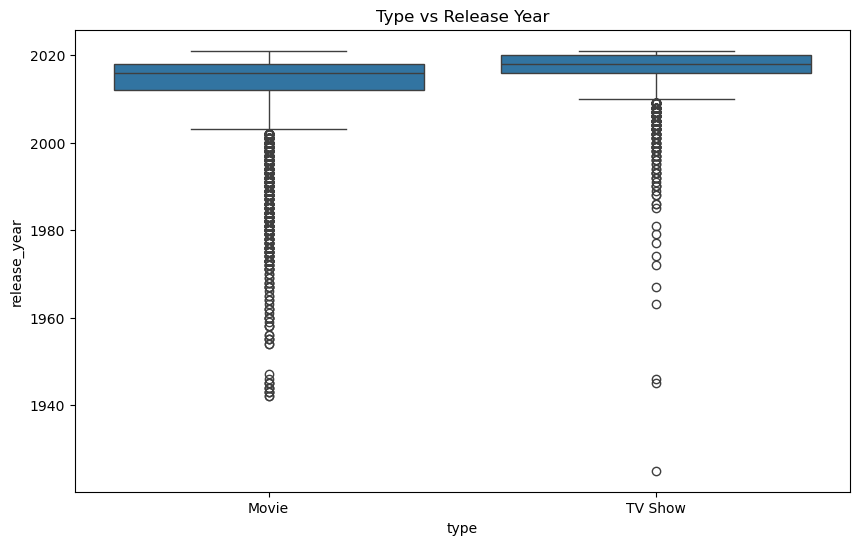

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Type vs Release Year')
plt.show()

**5.3 Multivariate Analysis**

Type vs Rating vs Release Year

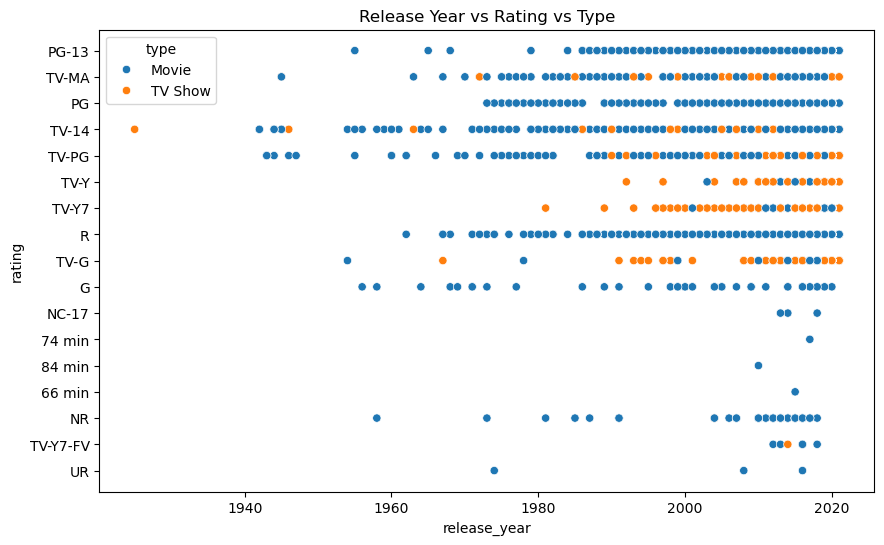

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='release_year', y='rating', hue='type', data=df)
plt.title('Release Year vs Rating vs Type')
plt.show()

**6 Outliers detection**

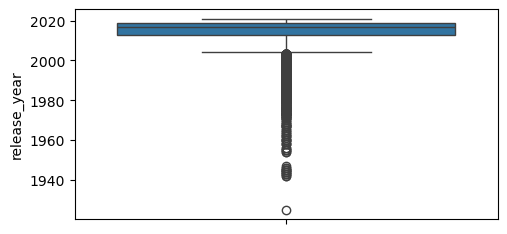

In [22]:
num_cols = ["release_year"]

plt.figure(figsize=(12,6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
plt.show()

In [24]:
Q1 = df["release_year"].quantile(0.25)
Q3 = df["release_year"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["release_year"] >= Q1 - 1.5*IQR) & (df["release_year"] <= Q3 + 1.5*IQR)]

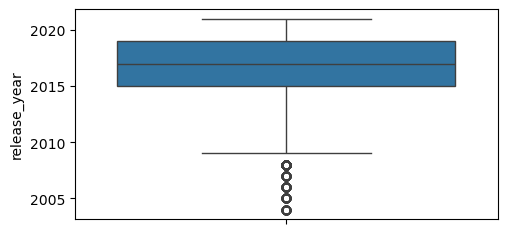

In [25]:
num_cols = ["release_year"]

plt.figure(figsize=(12,6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
plt.show()

In [26]:
Q1 = df["release_year"].quantile(0.25)
Q3 = df["release_year"].quantile(0.75)
IQR = Q3 - Q1

# Stricter range
df = df[(df["release_year"] >= Q1 - 1.0*IQR) & (df["release_year"] <= Q3 + 1.0*IQR)]

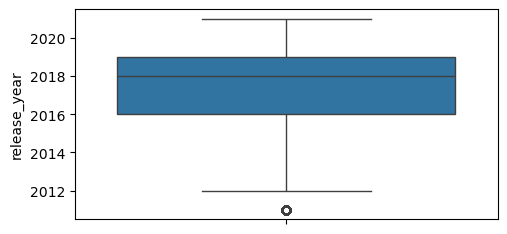

In [27]:
num_cols = ["release_year"]

plt.figure(figsize=(12,6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
plt.show()

In [28]:
Q1 = df["release_year"].quantile(0.25)
Q3 = df["release_year"].quantile(0.75)
IQR = Q3 - Q1

# Stricter range
df = df[(df["release_year"] >= Q1 - 1.0*IQR) & (df["release_year"] <= Q3 + 1.0*IQR)]

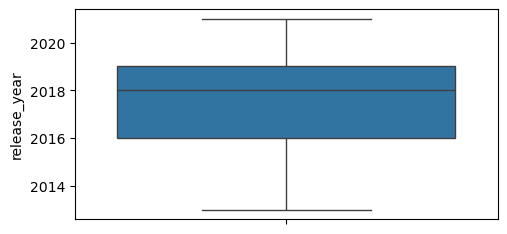

In [29]:
num_cols = ["release_year"]

plt.figure(figsize=(12,6))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(df[col])
plt.show()

In [30]:
df.describe()

,release_year
count,7624.000000
mean,2016.912775
std,2.942338
min,2009.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**key insights**

**Conclusion**

In [49]:
df=pd.read_csv("netflix.csv")
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8808,s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States","June 22, 2017",2017,R,81 min,Horror Movies,This four-part anthology of short horror films...
8809,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8810,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."
8811,s8769,Movie,Y Tu Mamá También,Alfonso Cuarón,"Maribel Verdú, Gael García Bernal, Diego Luna,...",Mexico,"June 1, 2017",2001,R,106 min,"Dramas, Independent Movies, International Movies",When rich teens Tenoch and Julio meet the allu...
8812,s8770,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,"March 1, 2018",2008,TV-MA,137 min,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, ..."


In [56]:
import pandas as pd

df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['day_month'] = df['date_added'].dt.strftime('%d-%m')
df['year'] = df['date_added'].dt.year

print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [52]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25-09,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24-09,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24-09,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24-09,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24-09,2021.0
